# Import libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score,make_scorer, recall_score, f1_score,roc_curve,auc
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import tensorflow as tf
from keras.optimizers import Adam
from keras.utils import to_categorical
import random



# Exploratory data analysis and preprocessing

In [2]:
# 1. Read data
file_path = '83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv'
data = pd.read_csv(file_path)
data.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,female,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,male,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,female,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,male,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,2,1,female,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886


In [3]:
data.shape # 2. check data shape

(1731, 20)

In [4]:
# 3. check null information
data.isnull().sum()

Species          0
Population       0
Latitude         0
Longitude        0
Year_start       0
Year_end         0
Temperature      0
Vial             0
Replicate        0
Sex              0
Thorax_length    0
l2               0
l3p              0
l3d              0
lpd              0
l3               0
w1               0
w2               0
w3               0
wing_loading     0
dtype: int64

In [5]:
# 4. View describe cases including continuous values and objects
data.describe()


,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,l2,l3p,l3d,lpd,l3,w1,w2,w3
count,1731.000000,1731.000000,1731.0,1731.0,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000
mean,-24.794910,150.821693,1994.0,1994.0,24.982669,5.517042,1.968226,1.723935,0.585854,1.455826,2.041169,2.040291,0.914038,1.252196,1.038279
std,1.958099,1.220711,0.0,0.0,4.076542,2.861570,0.812920,0.165536,0.053610,0.128044,0.178219,0.178354,0.074163,0.106781,0.089665
min,-27.680000,148.850000,1994.0,1994.0,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-25.520000,150.170000,1994.0,1994.0,20.000000,3.000000,1.000000,1.607000,0.547000,1.370000,1.920500,1.919000,0.864000,1.176000,0.976000
50%,-25.200000,151.170000,1994.0,1994.0,25.000000,6.000000,2.000000,1.722000,0.585000,1.457000,2.040000,2.039000,0.912000,1.251000,1.037000
75%,-23.770000,151.450000,1994.0,1994.0,30.000000,8.000000,3.000000,1.840000,0.624000,1.540000,2.159500,2.158500,0.963000,1.325500,1.100000
max,-21.770000,152.450000,1994.0,1994.0,30.000000,10.000000,3.000000,2.095000,0.742000,1.742000,2.419000,2.418000,1.084000,1.514000,1.282000


In [6]:
data.describe(include='object')

,Species,Population,Sex,Thorax_length,wing_loading
count,1731,1731,1731,1731,1731
unique,2,5,2,291,309
top,D._buzzatii,Gogango_Creek,male,1.126,1.777
freq,891,354,872,17,17


In [7]:
# 5.The target value is that the first column is binary. The next feature you don't want is Latitude Longitude Year_start Year_end Temperature Vial Replicate
target = data.columns[0]
drop_columns = ['Latitude', 'Longitude', 'Year_start', 'Year_end', 'Temperature', 'Vial', 'Replicate']
data = data.drop(columns=drop_columns)

In [8]:
data.replace('.', np.nan, inplace=True)
data.isnull().sum()

Species          0
Population       0
Sex              0
Thorax_length    1
l2               0
l3p              0
l3d              0
lpd              0
l3               0
w1               0
w2               0
w3               0
wing_loading     1
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730 entries, 0 to 1730
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1730 non-null   object 
 1   Population     1730 non-null   object 
 2   Sex            1730 non-null   object 
 3   Thorax_length  1730 non-null   object 
 4   l2             1730 non-null   float64
 5   l3p            1730 non-null   float64
 6   l3d            1730 non-null   float64
 7   lpd            1730 non-null   float64
 8   l3             1730 non-null   float64
 9   w1             1730 non-null   float64
 10  w2             1730 non-null   float64
 11  w3             1730 non-null   float64
 12  wing_loading   1730 non-null   object 
dtypes: float64(8), object(5)
memory usage: 189.2+ KB


In [11]:
data[['Thorax_length','wing_loading']]=data[['Thorax_length','wing_loading']].astype('float')

In [12]:
# 6. The object column is one hot encoding and the target column is label encoding
object_cols = data.drop(target,axis=1).select_dtypes(include=['object']).columns
data1 = pd.get_dummies(data, columns=object_cols,dtype='int')
label_encoder = LabelEncoder()
data1[target] = label_encoder.fit_transform(data[target])
data1.head()

,Species,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading,Population_Binjour,Population_Gogango_Creek,Population_Grandchester,Population_Oxford_Downs,Population_Wahruna,Sex_female,Sex_male
0,0,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914,1,0,0,0,0,1,0
1,0,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928,1,0,0,0,0,0,1
2,0,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908,1,0,0,0,0,1,0
3,0,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860,1,0,0,0,0,0,1
4,0,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886,1,0,0,0,0,1,0


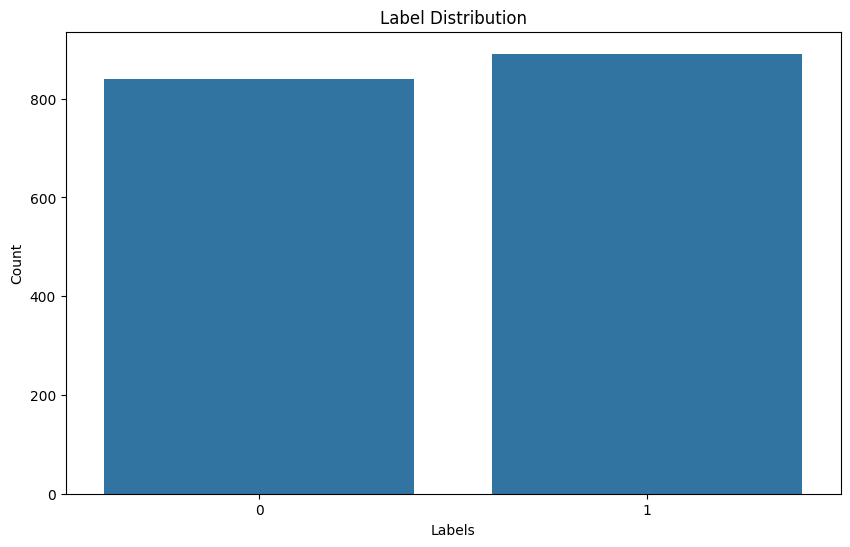

In [13]:
# 7. Draw a bar chart of the label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=data1[target])
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

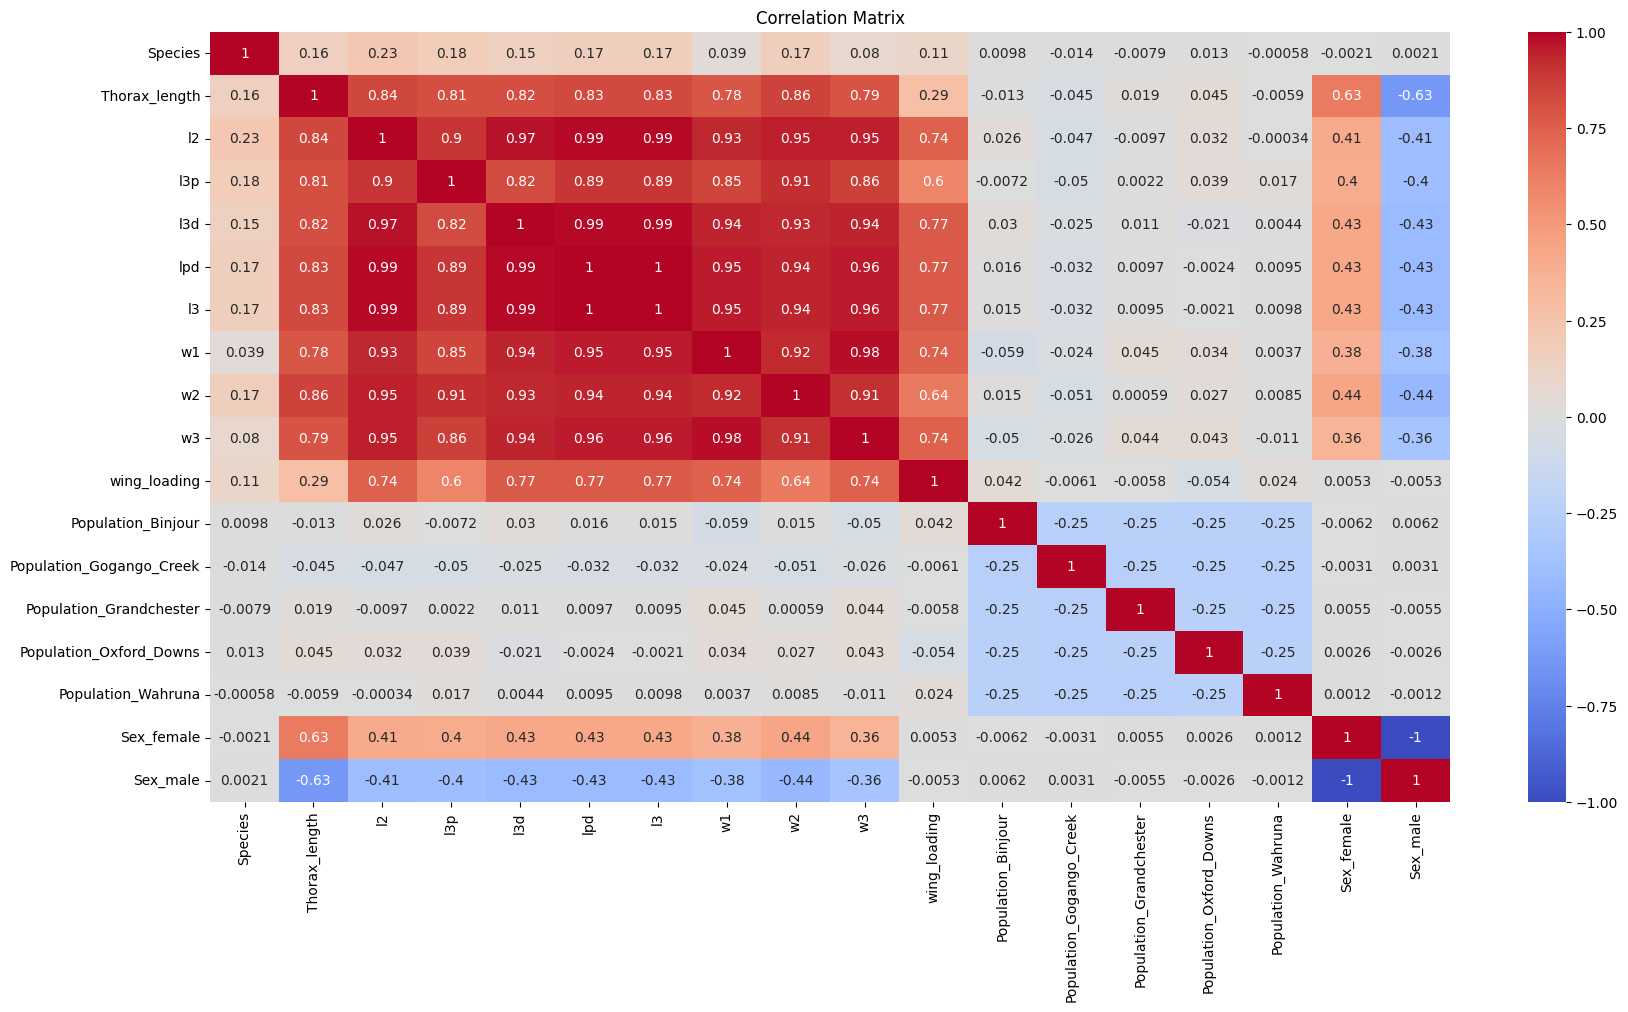

In [14]:
# 8. Plot the distribution of correlation coefficients between continuous variables and target values
plt.figure(figsize=(20, 10))
corr= data1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature selection and model tuning

In [30]:


def select_features_model(model):
    X = data1.drop(columns=[target],axis=1)
    y = data1[target]
    
    best_n = 0
    best_score = 0
    scores = []
    
    for n in range(1, X.shape[1] + 1):
        selector = SelectKBest(chi2, k=n)
        X_new = selector.fit_transform(X, y)
        score = cross_val_score(model, X_new, y, cv=5, scoring='accuracy').mean()
        scores.append(score)
        if score > best_score:
            best_score = score
            best_n = n
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, X.shape[1] + 1), scores, marker='o')
    plt.title('Number of Features vs. Accuracy')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.show()

    return best_n


def tune_parameter(model,param,param_grid,X_train, y_train):

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1_score': make_scorer(f1_score)
    }
    

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
    

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
 
    cv_results = cv_results[[f'param_{param}', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']]
    

    grouped_df = cv_results.groupby(f'param_{param}').mean().reset_index()

    plt.figure(figsize=(14, 8))
    
    plt.plot(grouped_df[f'param_{param}'], grouped_df['mean_test_accuracy'], marker='o', label='Accuracy')
    plt.plot(grouped_df[f'param_{param}'], grouped_df['mean_test_precision'], marker='o', label='Precision')
    plt.plot(grouped_df[f'param_{param}'], grouped_df['mean_test_recall'], marker='o', label='Recall')
    plt.plot(grouped_df[f'param_{param}'], grouped_df['mean_test_f1_score'], marker='o', label='F1 Score')
    
    plt.title(f'Metrics vs. {param}')
    plt.xlabel(param)
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    best_params = grid_search.best_params_
    best_index = grid_search.best_index_
    
    best_results = {
        'Best Parameters': best_params,
        'Mean Test Accuracy': grid_search.cv_results_['mean_test_accuracy'][best_index],
        'Mean Test Precision': grid_search.cv_results_['mean_test_precision'][best_index],
        'Mean Test Recall': grid_search.cv_results_['mean_test_recall'][best_index],
        'Mean Test F1 Score': grid_search.cv_results_['mean_test_f1_score'][best_index]
    }
    
    best_results_df = pd.DataFrame([best_results])
    return best_results_df,grouped_df


# Logistic regression model

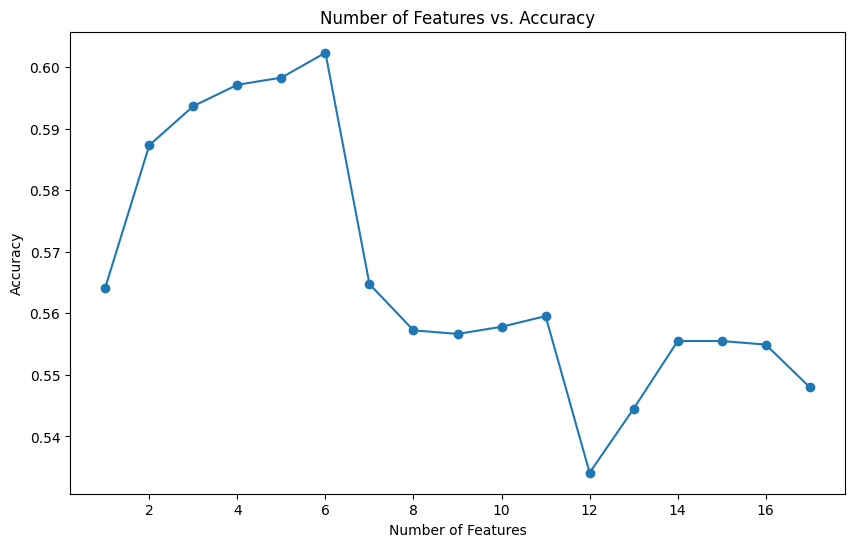

***
Best number of features for Logistic model is 6


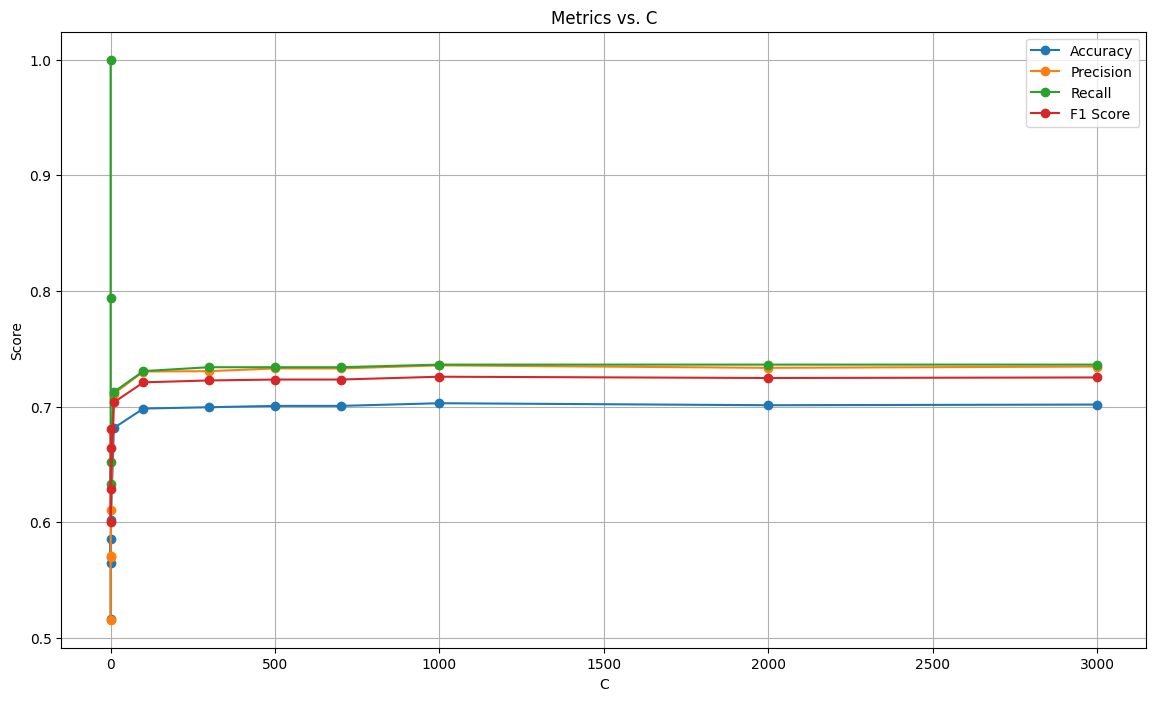

,Best Parameters,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1 Score
0,{'C': 1000},0.70289,0.735633,0.736288,0.725815


In [37]:

best_n=select_features_model(LogisticRegression())
print('***')
print(f'Best number of features for Logistic model is {best_n}')
selector = SelectKBest(chi2, k=best_n)
X = data1.drop(columns=[target],axis=1)
y = data1[target]
X_new = selector.fit_transform(X, y)

model=LogisticRegression()
param_grid={
    'C': [0.001,0.01,0.1,1,10,100,300,500,700,1000,2000,3000],

}
best_results_df_lr,grouped_df_lr=tune_parameter(model,'C',param_grid,X_new, y)
best_results_df_lr

# Decision tree model

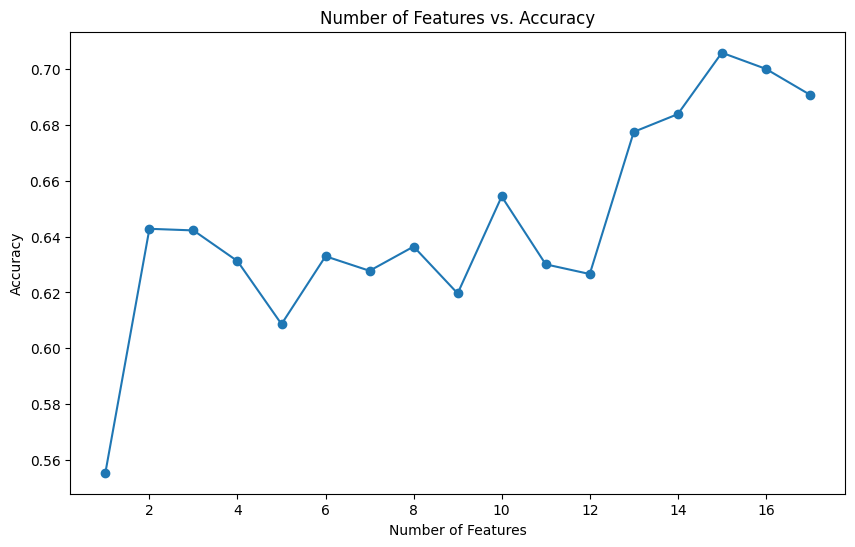

***
Best number of features for dt model is 15


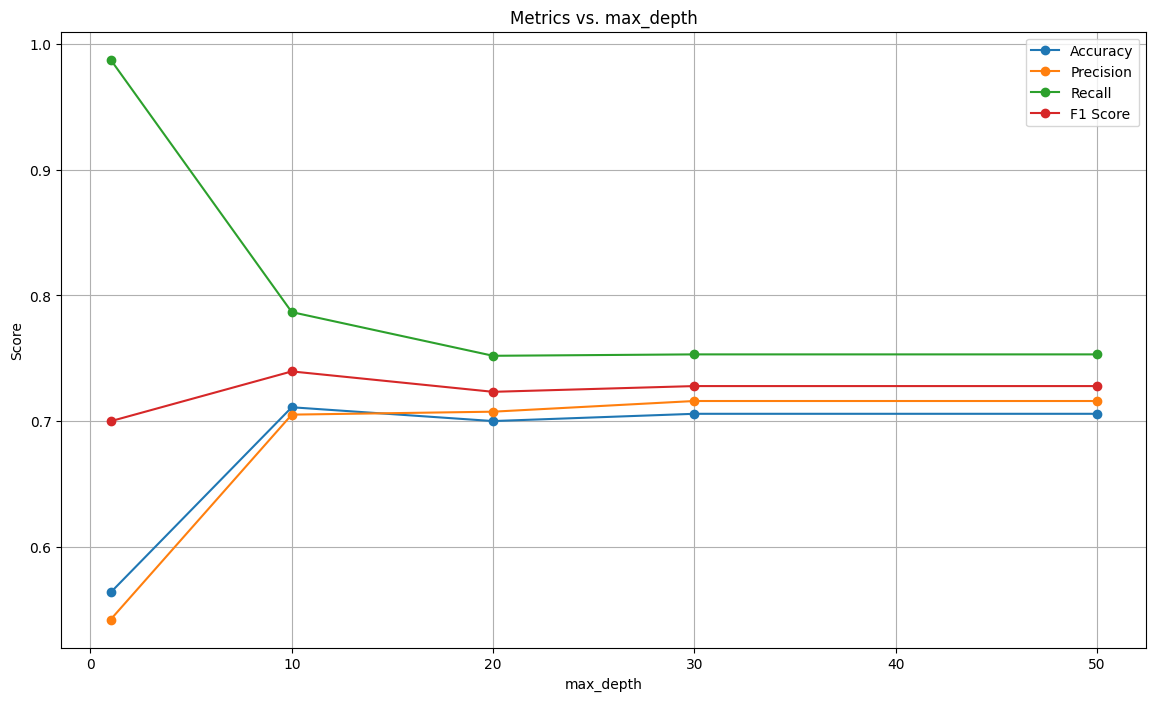

,Best Parameters,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1 Score
0,{'max_depth': 10},0.710983,0.705119,0.786699,0.739512


In [39]:
best_n=select_features_model(DecisionTreeClassifier(random_state=42))
print('***')
print(f'Best number of features for dt model is {best_n}')
selector = SelectKBest(chi2, k=best_n)
X = data1.drop(columns=[target],axis=1)
y = data1[target]
X_new = selector.fit_transform(X, y)

model=DecisionTreeClassifier(random_state=42)
param_grid={
    'max_depth': [None,1,10,20,30,50],

}
best_results_df_dt,grouped_df_dt=tune_parameter(model,'max_depth',param_grid,X_new, y)
best_results_df_dt

# Random forest model

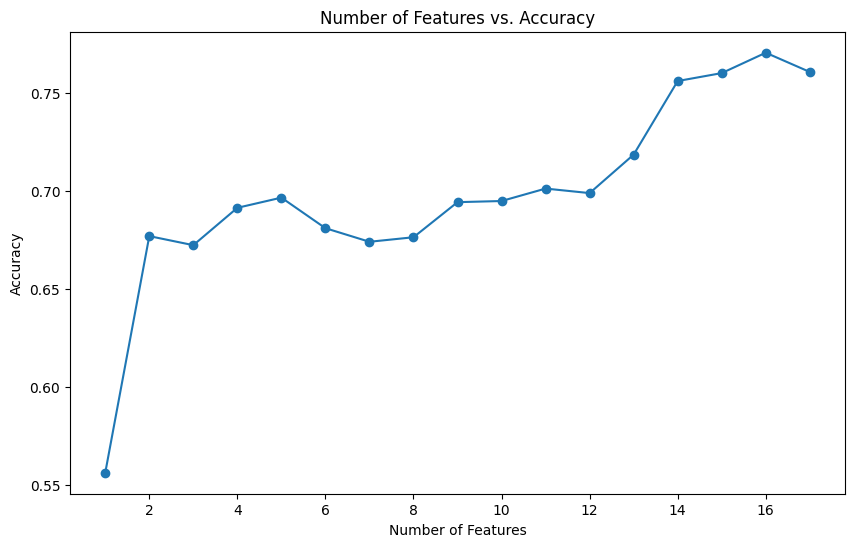

***
Best number of features for rf model is 16


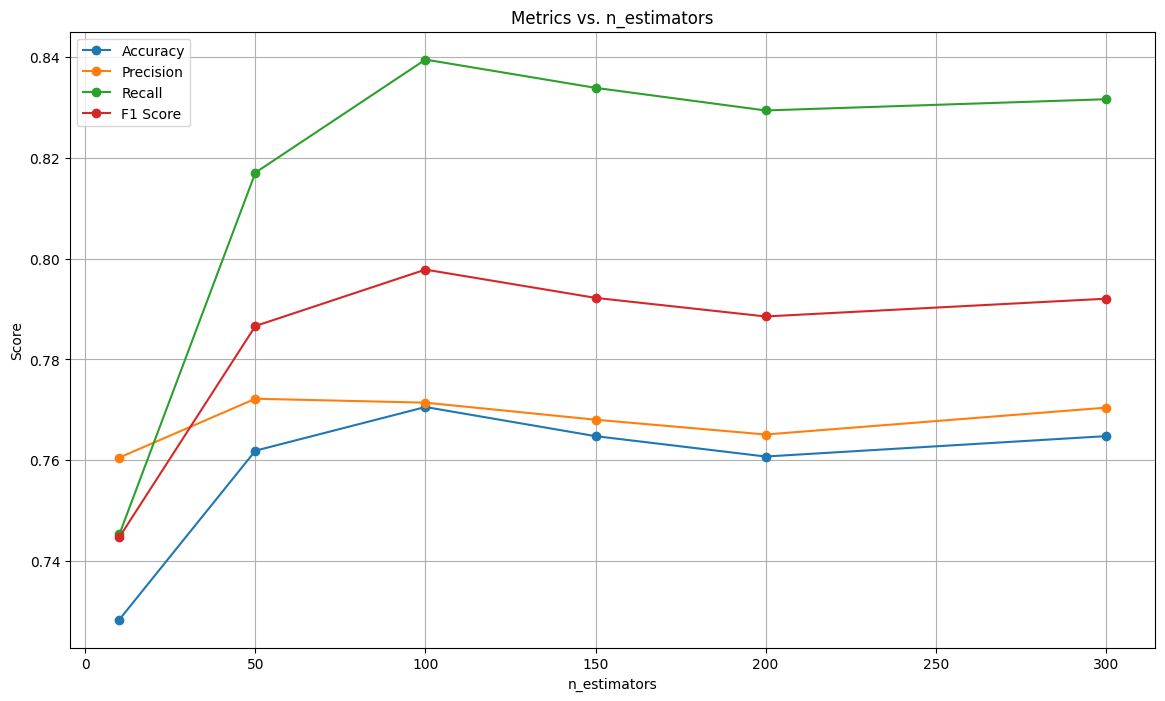

,Best Parameters,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1 Score
0,{'n_estimators': 100},0.77052,0.771386,0.839495,0.797804


In [42]:
best_n=select_features_model(RandomForestClassifier(random_state=42))
print('***')
print(f'Best number of features for rf model is {best_n}')
selector = SelectKBest(chi2, k=best_n)
X = data1.drop(columns=[target],axis=1)
y = data1[target]
X_new = selector.fit_transform(X, y)

model=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators': [10,50,100,150,200,300],

}
best_results_df_rf,grouped_df_rf=tune_parameter(model,'n_estimators',param_grid,X_new, y)
best_results_df_rf

# Xgboost model

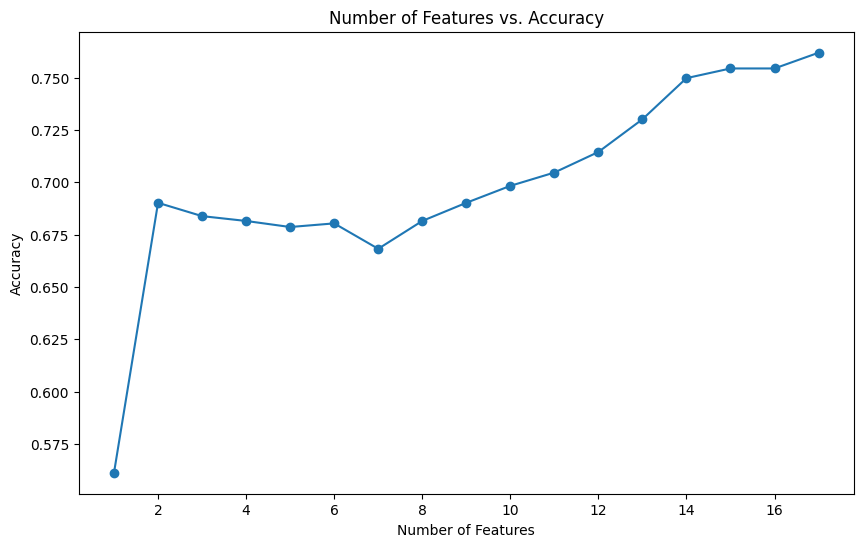

***
Best number of features for xgboost model is 17


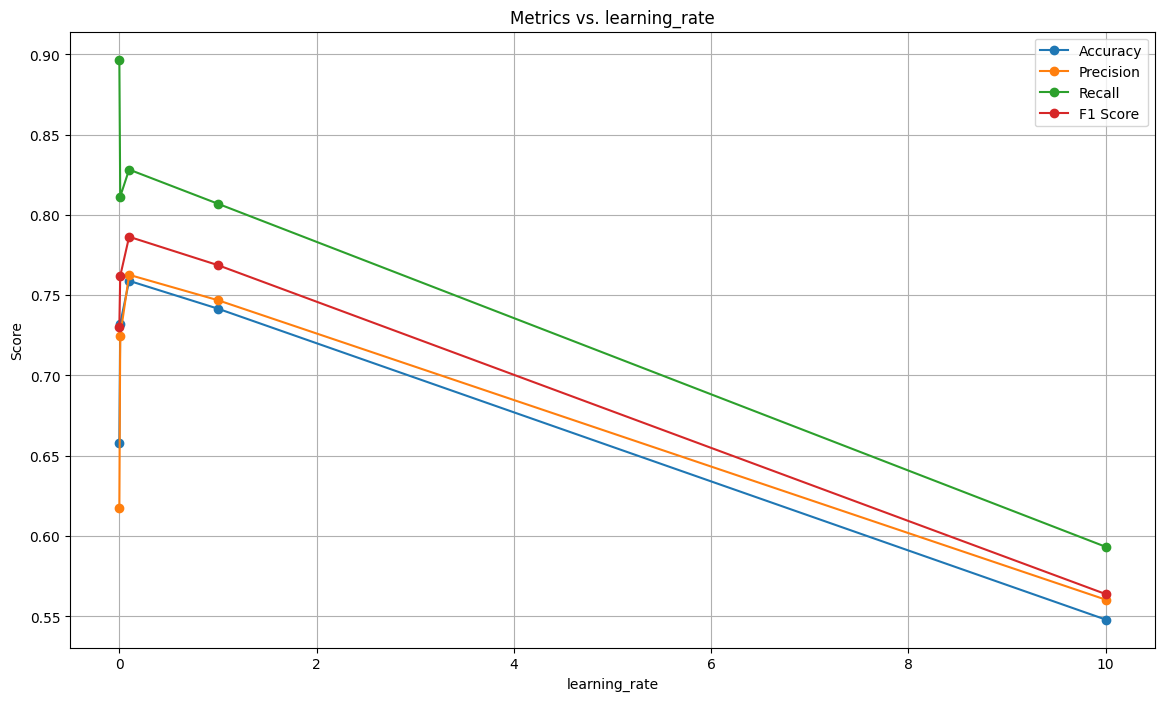

,Best Parameters,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1 Score
0,{'learning_rate': 0.1},0.75896,0.762701,0.828247,0.786397


In [44]:
best_n=select_features_model(XGBClassifier(random_state=42))
print('***')
print(f'Best number of features for xgboost model is {best_n}')
selector = SelectKBest(chi2, k=best_n)
X = data1.drop(columns=[target],axis=1)
y = data1[target]
X_new = selector.fit_transform(X, y)

model=XGBClassifier(random_state=42)
param_grid={
    'learning_rate': [1e-3, 0.01, 0.1, 1, 10],

}
best_results_df_xgb,grouped_df_xgb=tune_parameter(model,'learning_rate',param_grid,X_new, y)
best_results_df_xgb

# Model comparison

In [46]:
final_best_result=pd.concat([best_results_df_lr,best_results_df_dt,best_results_df_rf,best_results_df_xgb],axis=0)
final_best_result['model']=['lr','dt','rf','xgb']
final_best_result.sort_values('Mean Test Accuracy')

,Best Parameters,Mean Test Accuracy,Mean Test Precision,Mean Test Recall,Mean Test F1 Score,model
0,{'C': 1000},0.702890,0.735633,0.736288,0.725815,lr
0,{'max_depth': 10},0.710983,0.705119,0.786699,0.739512,dt
0,{'learning_rate': 0.1},0.758960,0.762701,0.828247,0.786397,xgb
0,{'n_estimators': 100},0.770520,0.771386,0.839495,0.797804,rf


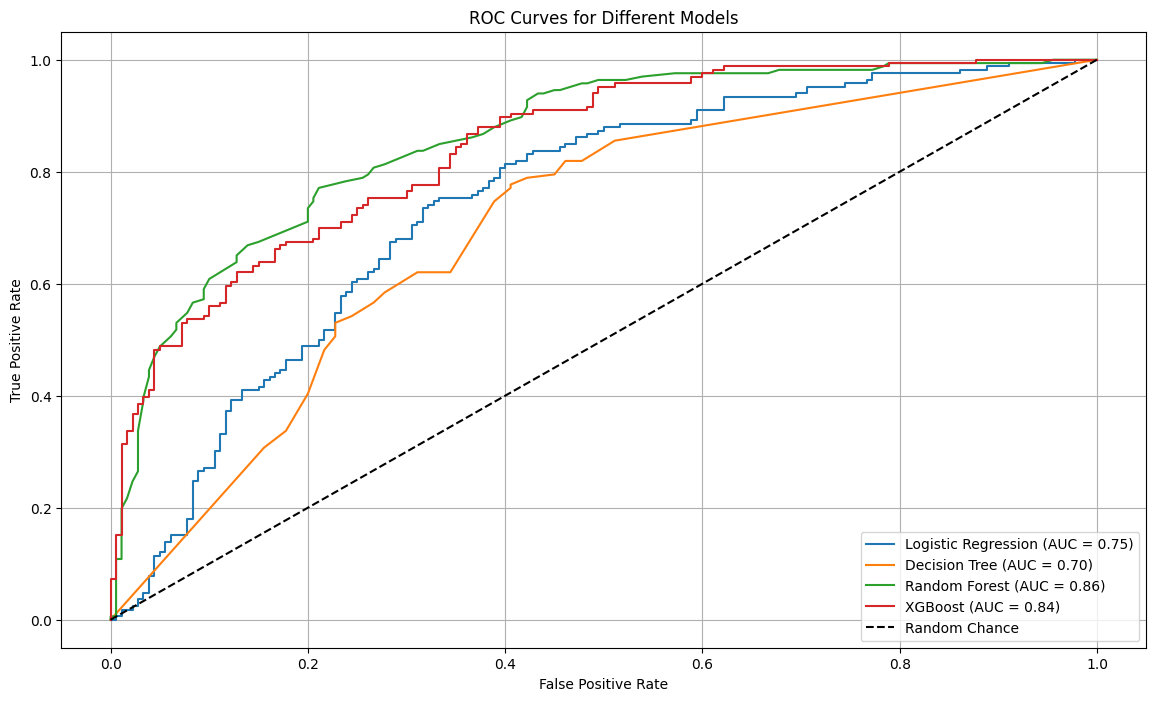

In [49]:
models = {
    'Logistic Regression': LogisticRegression(C=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=10,random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'XGBoost': XGBClassifier(learning_rate=0.1,random_state=42)
}

best_n_features = {
    'Logistic Regression': 6,
    'Decision Tree': 15,
    'Random Forest': 16,
    'XGBoost': 17
}

# Draw the ROC curve
plt.figure(figsize=(14, 8))

for model_name, model in models.items():
    # Select the best number of features
    k = best_n_features[model_name]
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    
    # Split the data set
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
    # Train the model and calculate the ROC curve and AUC values
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5.Deep learning modeling

In [60]:
def create_model(X_train,learning_rate=1e-3, kernel_size=3, filters=64):
    tf.keras.utils.set_random_seed(0)
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])
    return model

In [65]:
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to class encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [81]:
# Learning rate parameters
learning_rates = [0.0001, 0.001, 0.01, 0.1]
auc_scores_lr = []

for lr in learning_rates:
    model = create_model(X_train,learning_rate=lr, kernel_size=3, filters=64)
    tf.keras.utils.set_random_seed(0)
    history = model.fit(X_train, y_train, epochs=52, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    auc_score = max(history.history['val_auc'])
    auc_scores_lr.append(auc_score)


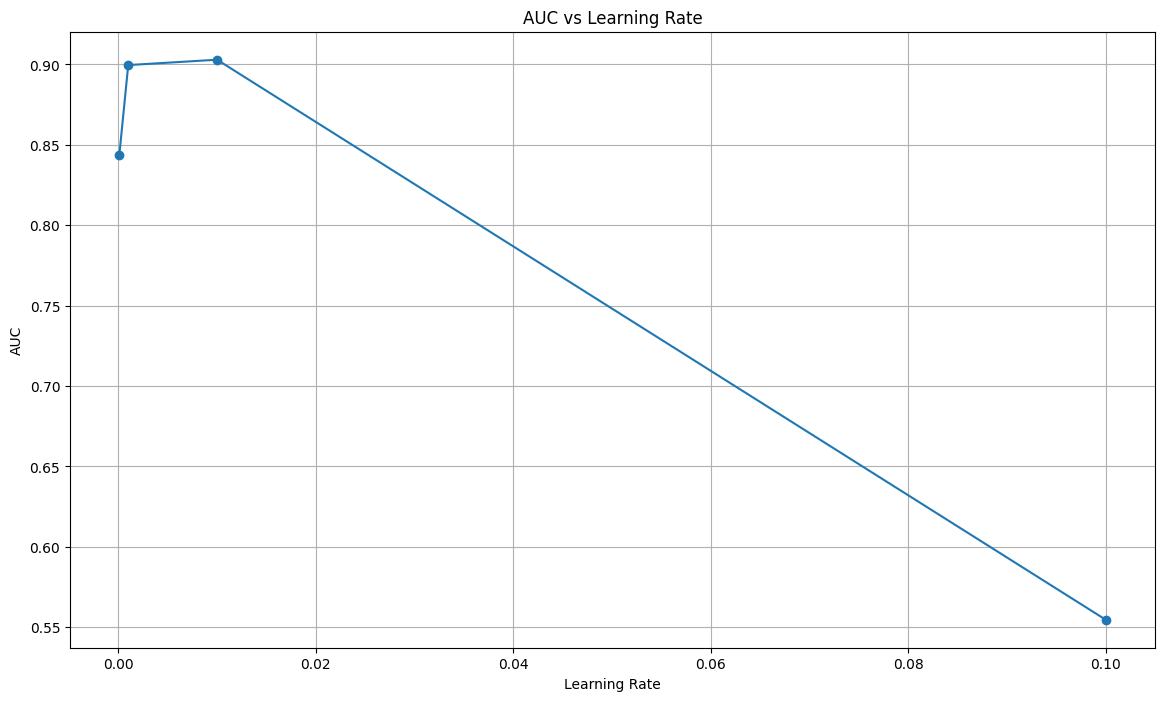

In [78]:
# Plot the curve of AUC as the learning rate changes
plt.figure(figsize=(14, 8))
plt.plot(learning_rates, auc_scores_lr, marker='o', label='Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('AUC')
plt.title('AUC vs Learning Rate')
plt.grid(True)
plt.show()




In [84]:
# model training
model= create_model(X_train,learning_rate=1e-2, kernel_size=3, filters=64)
tf.keras.utils.set_random_seed(0)
history =model.fit(X_train, y_train, epochs=52, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/52
87/87 [==============================] - 2s 12ms/step - loss: 0.6916 - auc: 0.5881 - val_loss: 0.6663 - val_auc: 0.6196
Epoch 2/52
87/87 [==============================] - 0s 6ms/step - loss: 0.6635 - auc: 0.6417 - val_loss: 0.6801 - val_auc: 0.6029
Epoch 3/52
87/87 [==============================] - 0s 6ms/step - loss: 0.6371 - auc: 0.6950 - val_loss: 0.5999 - val_auc: 0.7753
Epoch 4/52
87/87 [==============================] - 1s 6ms/step - loss: 0.6104 - auc: 0.7188 - val_loss: 0.5864 - val_auc: 0.7576
Epoch 5/52
87/87 [==============================] - 1s 6ms/step - loss: 0.5958 - auc: 0.7425 - val_loss: 0.5642 - val_auc: 0.7750
Epoch 6/52
87/87 [==============================] - 1s 6ms/step - loss: 0.5947 - auc: 0.7423 - val_loss: 0.5427 - val_auc: 0.7979
Epoch 7/52
87/87 [==============================] - 0s 6ms/step - loss: 0.5707 - auc: 0.7619 - val_loss: 0.5357 - val_auc: 0.8163
Epoch 8/52
87/87 [==============================] - 1s 6ms/step - loss: 0.5528 - auc: 0.7

In [87]:
model.summary() # model structure

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 15, 64)            256       
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 7, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 448)               0         
                                                                 
 dense_44 (Dense)            (None, 100)               44900     
                                                                 
 dropout_22 (Dropout)        (None, 100)               0         
                                                                 
 dense_45 (Dense)            (None, 2)                 202       
                                                     

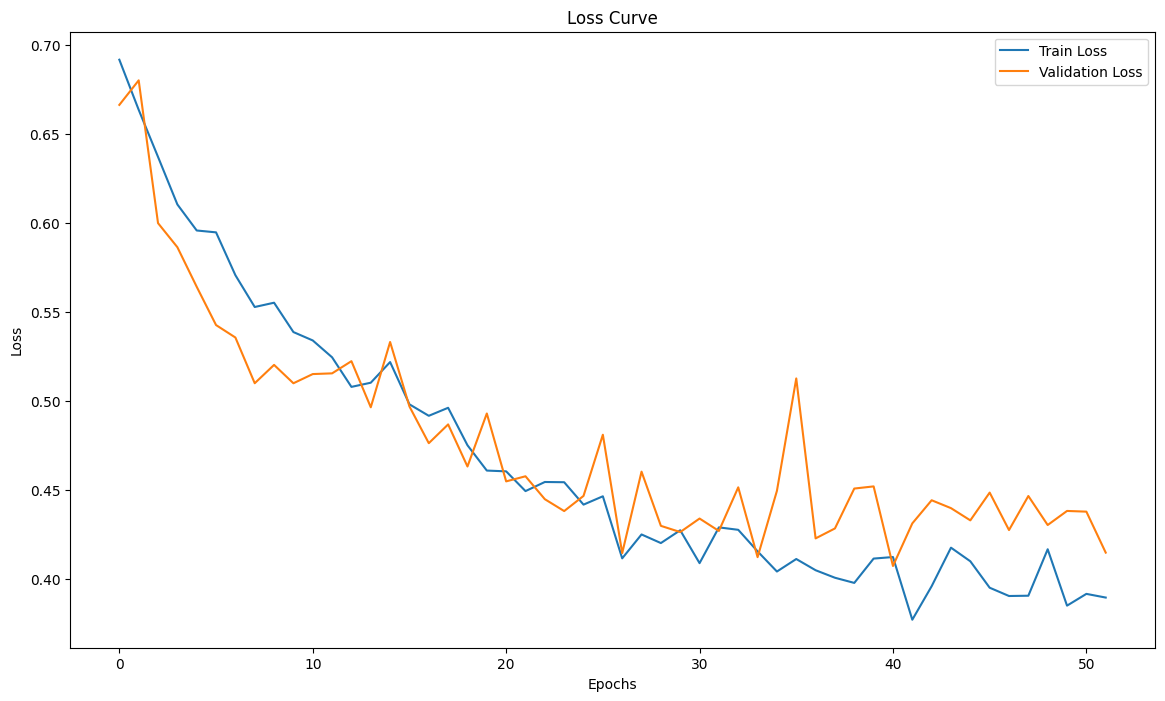

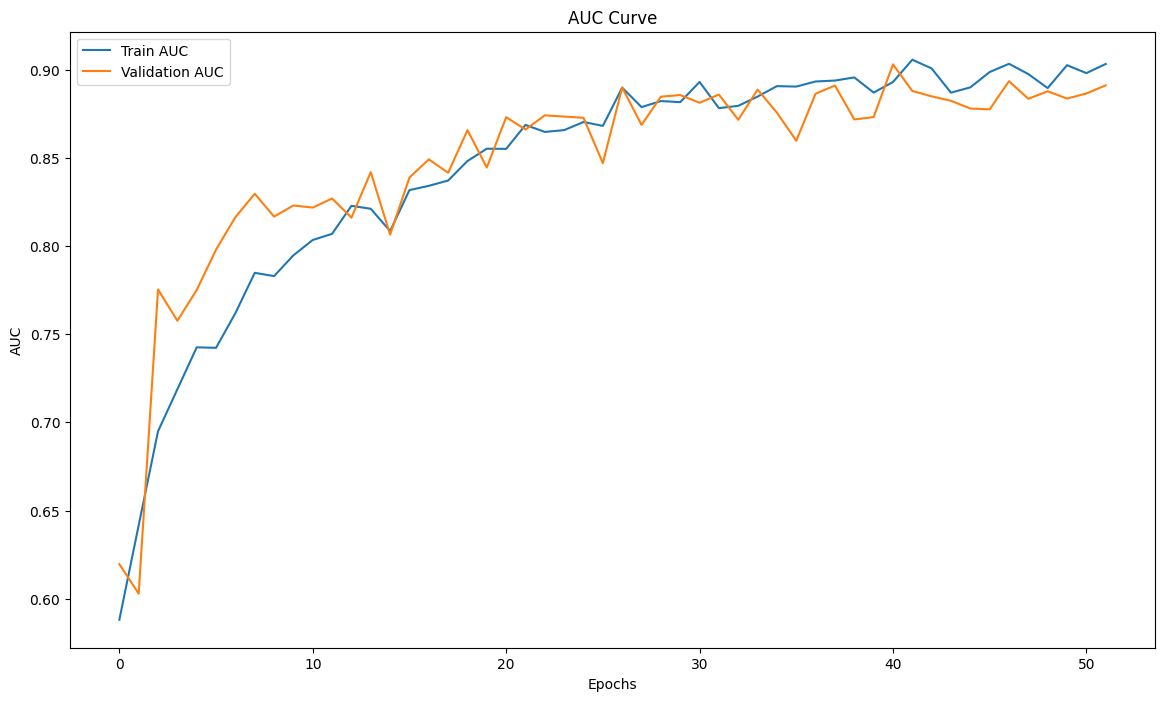

In [85]:
# Plot loss variations on training and validation sets
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Plot AUC variations on training and validation sets
plt.figure(figsize=(14, 8))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('AUC Curve')
plt.legend()
plt.show()

11/11 [==============================] - 0s 8ms/step


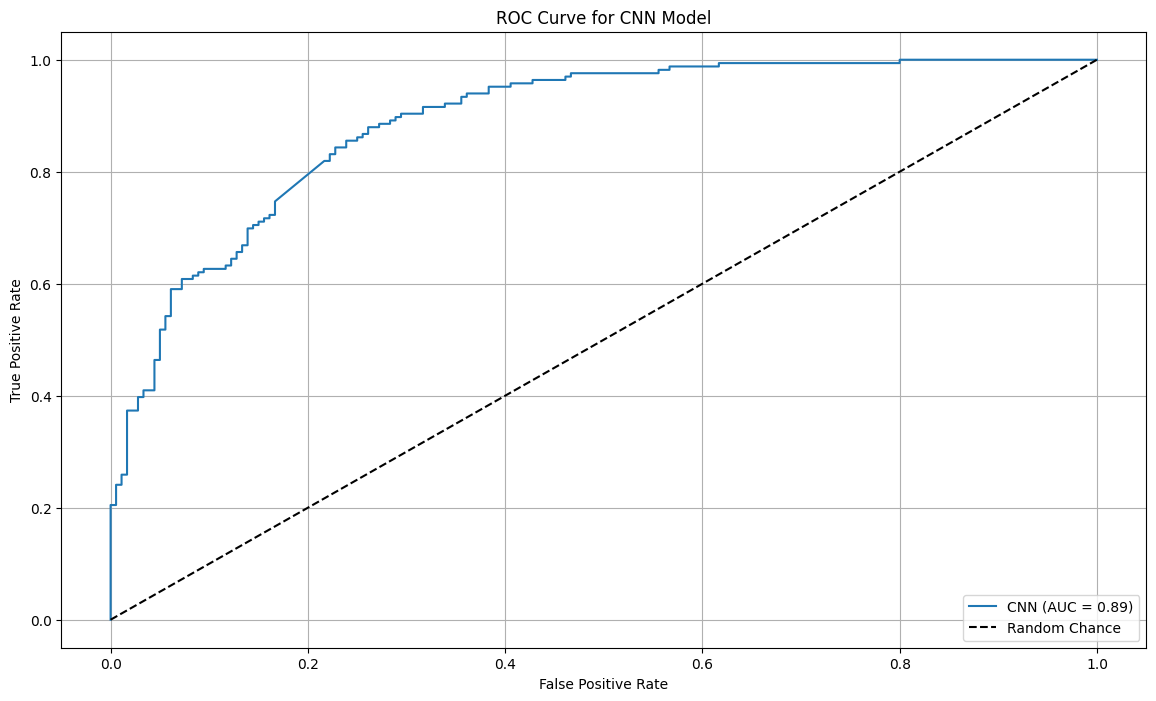

In [80]:
# Evaluation model
y_pred_prob =model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test.argmax(axis=1), y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Draw the ROC curve
plt.figure(figsize=(14, 8))
plt.plot(fpr, tpr, label=f'CNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve for CNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()